# PREDICTION USING UNSUPERVISED MACHINE LEARNING

## AUTHOR: TANISHA DAS

## TASK

### Iris dataset is given.We need to predict the optimum number of clusters and represent it visually.

In [1]:
#filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the required libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist

## Reading The Dataset For Further Analysis

In [3]:
#Setting the working directory
os.chdir(R'C:\Users\TANIA DAS\Downloads')
#loading the csv data into a data frame
iris=pd.read_csv("Iris.csv")
print("Data is imported successfully")

Data is imported successfully


## Exploratory Data Analysis

In [4]:
#Head of the data
display(iris.head())

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
# Checking the dimension of the data
iris.shape

(150, 6)

In [6]:
# Checking the column information
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
# Viewinng the column names
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
# Summary of all numerical data
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
# Checking for missing values if any
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

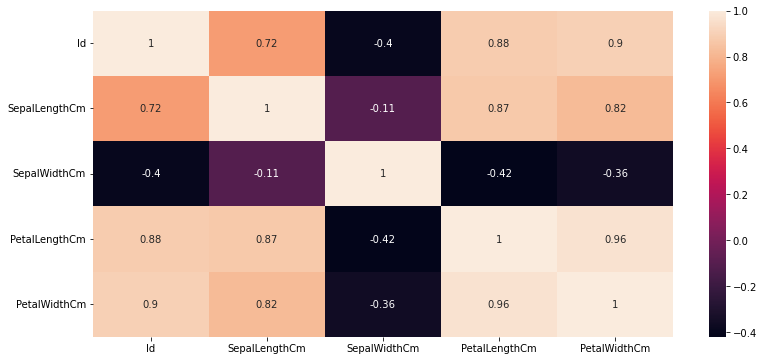

In [10]:
# Finding the correlation and plotting it
corr_data=iris.corr()
display(corr_data)
plt.subplots(figsize=(13,6))
sns.heatmap(corr_data,annot=True)

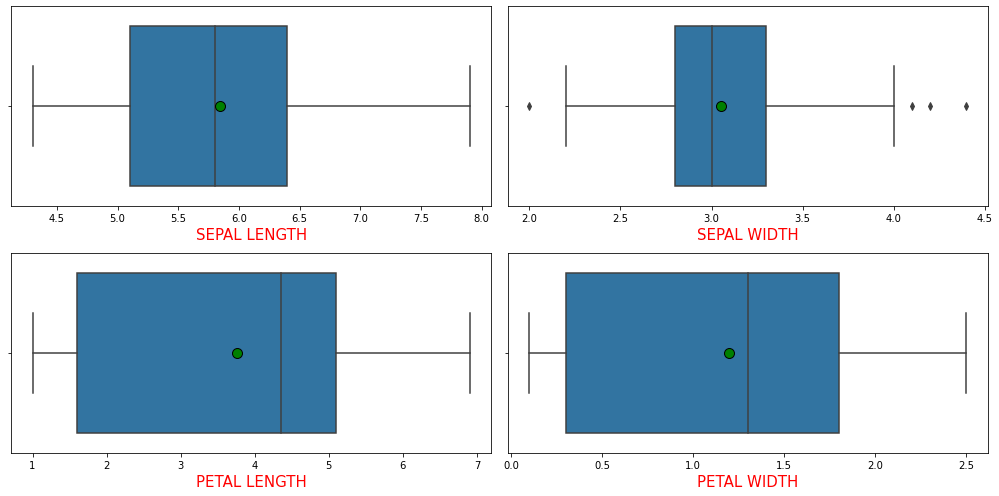

In [11]:
# Checking outliers by plotting boxplots for continuous variables
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(iris['SepalLengthCm'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'green','markeredgecolor':'black','markersize':10})
plt.xlabel('SEPAL LENGTH',fontdict={'color':'red','size':15})

plt.subplot(2,2,2)
sns.boxplot(iris['SepalWidthCm'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'green','markeredgecolor':'black','markersize':10})
plt.xlabel('SEPAL WIDTH',fontdict={'color':'red','size':15})

plt.subplot(2,2,3)
sns.boxplot(iris['PetalLengthCm'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'green','markeredgecolor':'black','markersize':10})
plt.xlabel('PETAL LENGTH',fontdict={'color':'red','size':15})

plt.subplot(2,2,4)
sns.boxplot(iris['PetalWidthCm'],showmeans=True,meanprops={'marker':'o','markerfacecolor':'green','markeredgecolor':'black','markersize':10})
plt.xlabel('PETAL WIDTH',fontdict={'color':'red','size':15})

plt.tight_layout()

### There are no outliers

## Univariate Analysis

In [12]:
iris['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

### From the above data we can say that, the iris dataset is a balanced dataset as the number of datapoints for every class are same.

Text(0, 0.5, 'COUNT')

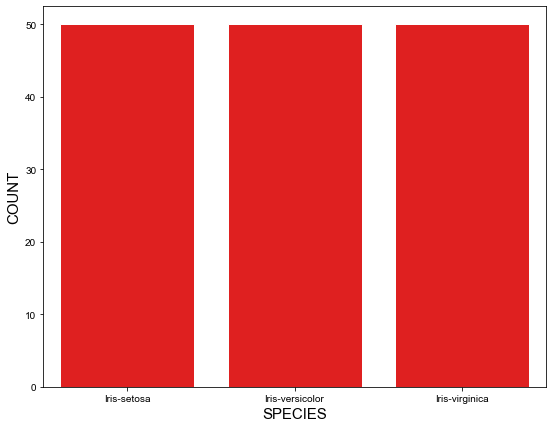

In [13]:
plt.subplots(figsize=(9,7))
sns.set(style='dark')
sns.countplot(iris['Species'],color='red')
plt.xlabel('SPECIES',fontdict={'color':'black','size':15})
plt.ylabel('COUNT',fontdict={'color':'black','size':15})

Text(0.5, 0, 'PETAL LENGTH')

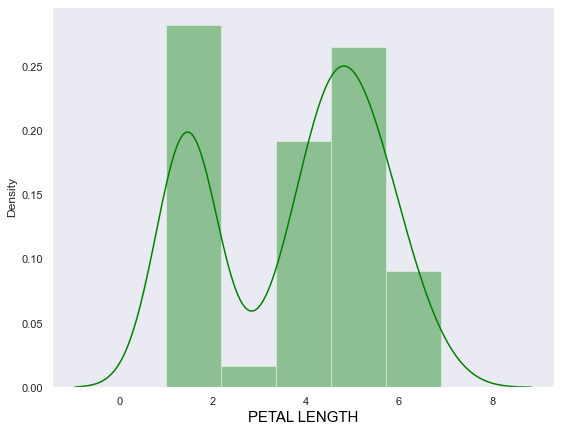

In [14]:
plt.subplots(figsize=(9,7))
sns.set(style='dark')
sns.distplot(iris['PetalLengthCm'],color='#008000')
plt.xlabel('PETAL LENGTH',fontdict={'color':'black','size':15})

Text(0.5, 0, 'SEPAL LENGTH')

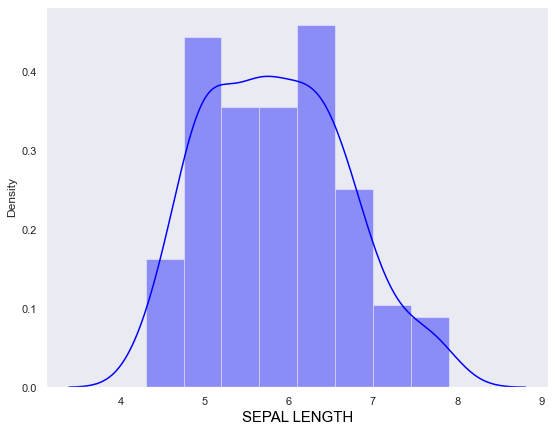

In [15]:
plt.subplots(figsize=(9,7))
sns.set(style='dark')
sns.distplot(iris['SepalLengthCm'],color='blue')
plt.xlabel('SEPAL LENGTH',fontdict={'color':'black','size':15})

Text(0.5, 0, 'PETAL WIDTH')

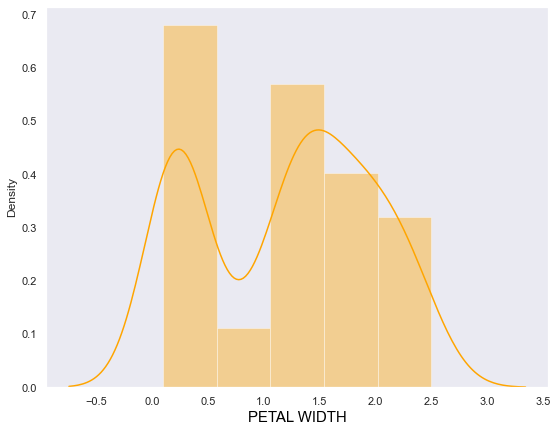

In [16]:
plt.subplots(figsize=(9,7))
sns.set(style='dark')
sns.distplot(iris['PetalWidthCm'],color='orange')
plt.xlabel('PETAL WIDTH',fontdict={'color':'black','size':15})

Text(0.5, 0, 'SEPAL WIDTH')

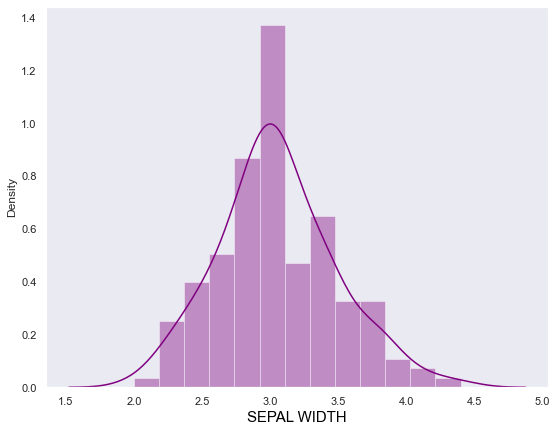

In [17]:
plt.subplots(figsize=(9,7))
sns.set(style='dark')
sns.distplot(iris['SepalWidthCm'],color='#800080')
plt.xlabel('SEPAL WIDTH',fontdict={'color':'black','size':15})

## Bivariate Analysis

Text(0.5, 1.0, 'SEPAL LENGTH VS SEPAL WIDTH')

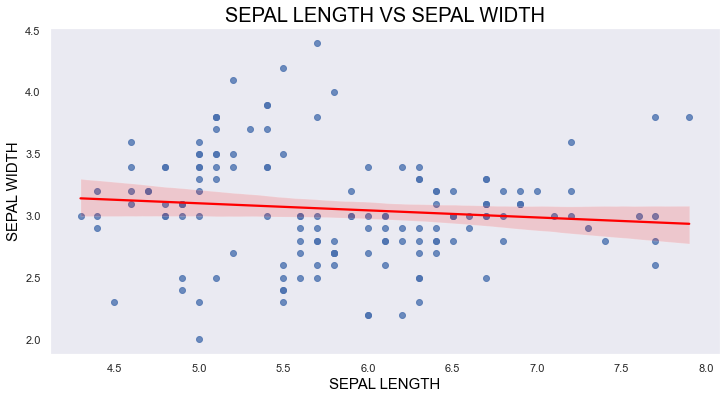

In [18]:
plt.subplots(figsize=(12,6))
sns.set(style='dark')
sns.regplot(x=iris['SepalLengthCm'],y=iris['SepalWidthCm'],line_kws={'color':'red'})
plt.xlabel('SEPAL LENGTH',fontdict={'color':'black','size':15})
plt.ylabel('SEPAL WIDTH',fontdict={'color':'black','size':15})
plt.title('SEPAL LENGTH VS SEPAL WIDTH',fontdict={'color':'black','size':20})

Text(0.5, 1.0, 'PETAL LENGTH VS PETAL WIDTH')

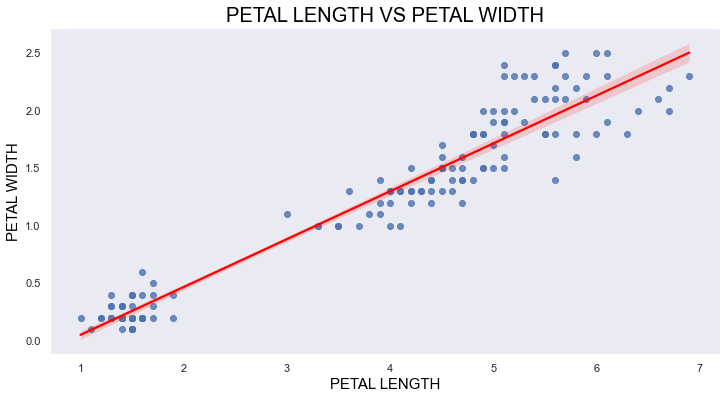

In [19]:
plt.subplots(figsize=(12,6))
sns.set(style='dark')
sns.regplot(x=iris['PetalLengthCm'],y=iris['PetalWidthCm'],line_kws={'color':'red'})
plt.xlabel('PETAL LENGTH',fontdict={'color':'black','size':15})
plt.ylabel('PETAL WIDTH',fontdict={'color':'black','size':15})
plt.title('PETAL LENGTH VS PETAL WIDTH',fontdict={'color':'black','size':20})

### There is a strong positive relationship between petal length and petal width and weak negative relationship between sepal length and sepal width

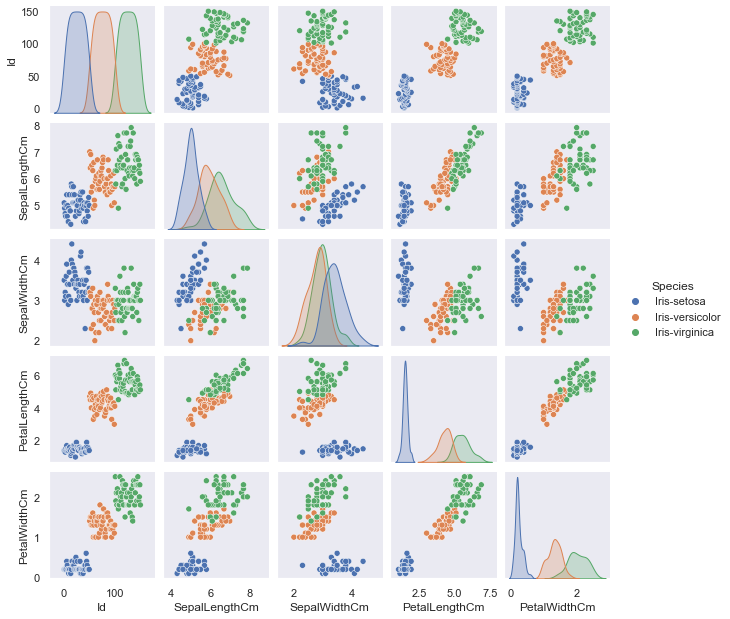

In [20]:
#Plotting Pairplot
sns.set(style='dark')
sns.pairplot(iris,hue="Species",size=1.75);
plt.show()

In [21]:
# Converting Categorical Features into Numeric
label=LabelEncoder()
label.fit(iris['Species'])
iris['Species']=label.transform(iris['Species'])

## Scaling the Data

In [22]:
display(iris)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [23]:
new=iris.iloc[:,[1,2,3,4]]

In [24]:
scaling=StandardScaler().fit(new.values)
new=scaling.transform(new.values)

### The data frame has been scaled or standardized

## Elbow Method For Optimal Value Of k in KMeans

In [26]:
distortions=[]  #It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.[Measure of Hetrogeneity]
inertias=[]   # It is the sum of squared distances of samples to their closest cluster center.[Measure of Homogenity]
mapping1={}
mapping2={}
K=range(1,10)

In [27]:
for i in K:
    #Building and fitting the model
    kmeans=KMeans(n_clusters=i,random_state=0).fit(new)
    kmeans.fit(new)
    
    distortions.append(sum(np.min(cdist(new,kmeans.cluster_centers_,'euclidean'),axis=1))/new.shape[0])
    inertias.append(kmeans.inertia_)
    
    mapping1[i]=sum(np.min(cdist(new,kmeans.cluster_centers_,'euclidean'),axis=1))/new.shape[0]
    mapping2[i]=kmeans.inertia_

1 : 1.8646205767971828
2 : 1.0642507146657962
3 : 0.864104415693925
4 : 0.776530824292977
5 : 0.6969934330939893
6 : 0.6589851296449323
7 : 0.6198668448386784
8 : 0.5717236178676084
9 : 0.5425015253514345


Text(0, 0.5, 'Distortion')

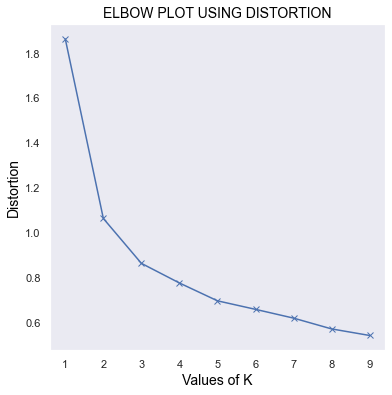

In [28]:
#Based on Distortions
for key,val in mapping1.items():
    print(str(key)+' : '+str(val))

plt.figure(figsize=(6,6))
plt.plot(K,distortions,'bx-')
plt.title('ELBOW PLOT USING DISTORTION',fontdict={'color':'black','size':14})
plt.xlabel('Values of K',fontdict={'color':'black','size':14})
plt.ylabel('Distortion',fontdict={'color':'black','size':14})

1 : 600.0000000000003
2 : 223.73200573676343
3 : 140.96581663074699
4 : 114.6822160993797
5 : 91.19197002146461
6 : 80.19300510158155
7 : 71.3007056411862
8 : 62.45268372832474
9 : 54.31087378179731


Text(0, 0.5, 'Inertia')

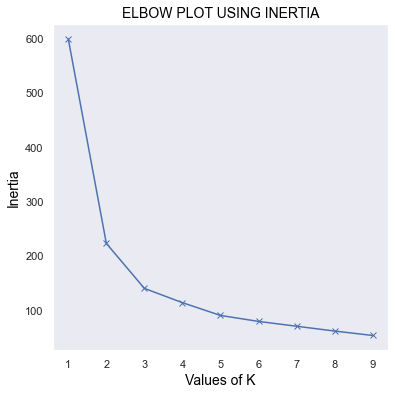

In [29]:
#Based on Inertia
for key,val in mapping2.items():
    print(str(key)+' : '+str(val))

plt.figure(figsize=(6,6))    
plt.plot(K,inertias,'bx-')
plt.title('ELBOW PLOT USING INERTIA',fontdict={'color':'black','size':14})
plt.xlabel('Values of K',fontdict={'color':'black','size':14})
plt.ylabel('Inertia',fontdict={'color':'black','size':14})

### It is clear from the figure that we should take the number of clusters equal to 3, as the slope of the curve is not steep enough after it.

## K-Means Clustering

In [30]:
kmeans1=KMeans(n_clusters=3,random_state=0)
kmeans1.fit(new)

KMeans(n_clusters=3, random_state=0)

In [31]:
cluster=kmeans1.predict(new)
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

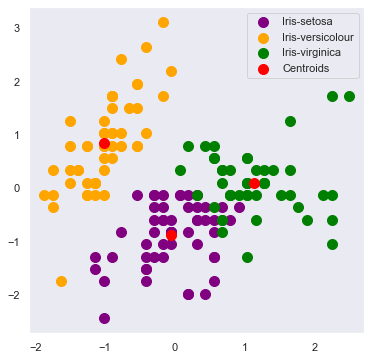

In [37]:
#Visualising the clusters
plt.figure(figsize=(6,6))
plt.scatter(new[cluster == 0, 0], new[cluster == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(new[cluster == 1, 0], new[cluster == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(new[cluster == 2, 0], new[cluster == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans1.cluster_centers_[:, 0], kmeans1.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.show()

### This shows the clusters present in the given dataset among species setosa, versicolour, virginica.